# AB Testing

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy import stats
from statsmodels.stats import weightstats as stests

In [50]:
import os
os.chdir("C:\\Users\\toby.cremer\\Documents\\Python\\AB Test\\")

# Conversion

In [51]:
df = pd.read_csv("conversion_data.csv")

In [52]:
df.head()

,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Day           30 non-null     int64  
 1   Conversion_A  30 non-null     float64
 2   Conversion_B  30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [54]:
df.shape

(30, 3)

In [55]:
# Descriptive Statistics
df.describe()

,Day,Conversion_A,Conversion_B
count,30.000000,30.000000,30.000000
mean,15.500000,0.162000,0.193333
std,8.803408,0.036141,0.027334
min,1.000000,0.100000,0.150000
25%,8.250000,0.132500,0.180000
50%,15.500000,0.165000,0.190000
75%,22.750000,0.187500,0.200000
max,30.000000,0.230000,0.270000


C:\Users\toby.cremer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Conversion_A', ylabel='Density'>

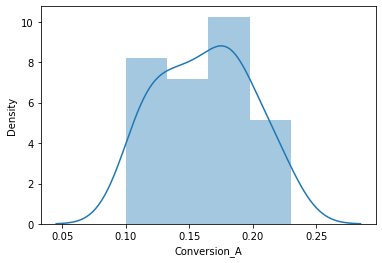

In [56]:
sns.distplot(df['Conversion_A'])

C:\Users\toby.cremer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Conversion_B', ylabel='Density'>

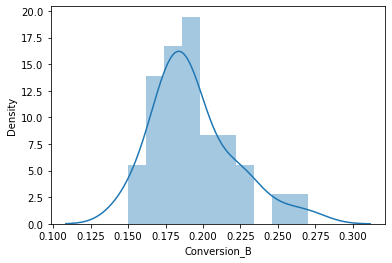

In [57]:
sns.distplot(df['Conversion_B'])

## Statistical Test

### Hypothesis

###### H0: Mean of Conversion A = Mean of Conversion B (The average conversion of A is equal to or the same as B)
###### H1: Mean of Conversion A =! Mean of Conversion B (The average conversion of A is not the same as B)

In [58]:
# T-test

t_stat, p_value = ss.ttest_ind(df['Conversion_A'], df['Conversion_B'])

In [59]:
print(t_stat)
print(p_value*100)

-3.78736793091929
0.0363796012828762


### Results

##### The performance of Conversion A is less than the performance of Conversion B
##### The p value confirms that this is statistcally significant

# AB Test Results

In [61]:
df = pd.read_csv("AB_Test_Results.csv")

In [62]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [74]:
df.shape

(10000, 3)

In [71]:
df[df['VARIANT_NAME'] == 'variant']['REVENUE'].mean()

0.07006977671451357

In [72]:
df[df['VARIANT_NAME'] == 'control']['REVENUE'].mean()

0.1290128410914928

C:\Users\toby.cremer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='REVENUE', ylabel='Density'>

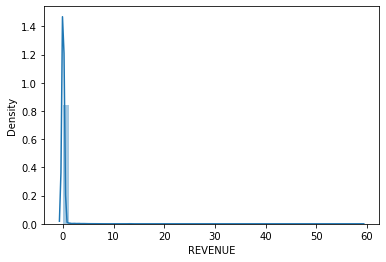

In [75]:
sns.distplot(df[df['VARIANT_NAME'] == 'variant']['REVENUE'])

C:\Users\toby.cremer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='REVENUE', ylabel='Density'>

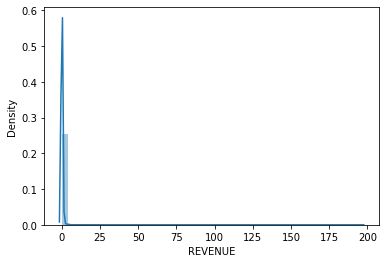

In [76]:
sns.distplot(df[df['VARIANT_NAME'] == 'control']['REVENUE'])

## Statistical Test

### Hypothesis

###### H0: Variant = Control
###### H1: Variant =! Control

In [89]:
# Z test

ztest, p_val = stests.ztest(df[df['VARIANT_NAME'] == 'control']['REVENUE'], df[df['VARIANT_NAME'] == 'variant']['REVENUE'])

In [90]:
print(ztest)
print(p_val)

1.2711634519010084
0.20367050576991452


### Results

##### The control is outperforming the variant
##### However the p values is high so this could be due to random chance

# Grocery Website Data

In [93]:
df = pd.read_csv("grocerywebsiteabtestdata.csv")

In [94]:
df.head()

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag
0,1,39.13.114.2,1,2,0
1,2,13.3.25.8,1,1,0
2,3,247.8.211.8,1,1,0
3,4,124.8.220.3,0,3,0
4,5,60.10.192.7,0,2,0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184588 entries, 0 to 184587
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   RecordID       184588 non-null  int64 
 1   IP Address     184588 non-null  object
 2   LoggedInFlag   184588 non-null  int64 
 3   ServerID       184588 non-null  int64 
 4   VisitPageFlag  184588 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 7.0+ MB


In [97]:
df.shape

(184588, 5)

In [98]:
df['LoggedInFlag'].unique()

array([1, 0], dtype=int64)

In [99]:
df['ServerID'].unique()

array([2, 1, 3], dtype=int64)

In [100]:
df['VisitPageFlag'].unique()

array([0, 1], dtype=int64)

# Cookie Cats

In [101]:
df = pd.read_csv("cookie_cats.csv")

In [102]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [105]:
df.shape

(90189, 5)

In [108]:
df[df['version'] == 'gate_30']['sum_gamerounds'].mean()

52.45626398210291

In [109]:
df[df['version'] == 'gate_40']['sum_gamerounds'].mean()

51.29877552814966

C:\Users\toby.cremer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sum_gamerounds', ylabel='Density'>

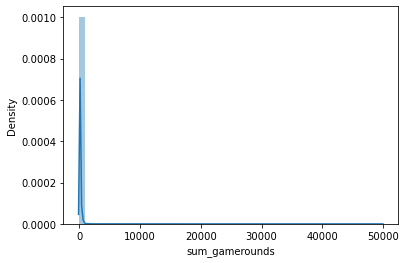

In [110]:
sns.distplot(df[df['version'] == 'gate_30']['sum_gamerounds'])

C:\Users\toby.cremer\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sum_gamerounds', ylabel='Density'>

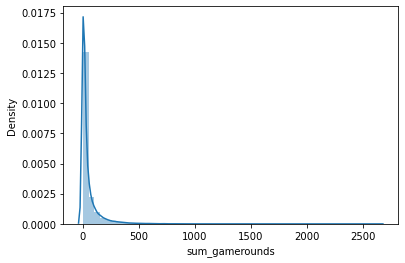

In [112]:
sns.distplot(df[df['version'] == 'gate_40']['sum_gamerounds'])

### Statistical Test

### Hypothesis

##### H0: Is there no differenc between Gate 30 and Gate 40 (Gate 30 sum of games rounds = Gate 40 sum of games rounds)

##### H1: There is a differnce between Gate 30 and Gate 40 ( Gate 30 sum of games rounds =! Gate 40 sum of games rounds)

In [114]:
z_stat, p_value = stests.ztest(df[df['version'] == 'gate_30']['sum_gamerounds'], df[df['version'] == 'gate_40']['sum_gamerounds'])

In [115]:
print(z_stat)
print(p_value)

0.8910426211362967
0.3729063054150682


### Results

##### Gate 30 has a high sum of games rounds

##### However the p values is indicating that this could be due to random chance

In [118]:
df[df['version'] == 'gate_30']['retention_1'].mean()

0.4481879194630872

In [120]:
df[df['version'] == 'gate_40']['retention_1'].mean()

0.44228274967574577

In [121]:
z_stat, p_value = stests.ztest(df[df['version'] == 'gate_30']['retention_1'], df[df['version'] == 'gate_40']['retention_1'])

In [122]:
print(z_stat)
print(p_value)

1.7840979256519656
0.07440775430035963


In [123]:
df[df['version'] == 'gate_30']['retention_7'].mean()

0.19020134228187918

In [124]:
df[df['version'] == 'gate_40']['retention_7'].mean()

0.18200004396667327

In [125]:
z_stat, p_value = stests.ztest(df[df['version'] == 'gate_30']['retention_7'], df[df['version'] == 'gate_40']['retention_7'])

In [126]:
print(z_stat)
print(p_value)

3.1644994996802778
0.0015534992923098888


# Landing Page Test

In [172]:
df = pd.read_csv("ab_data.csv")

In [173]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [174]:
print(df.shape)
print(df.user_id.nunique())

(294478, 5)
290584


In [178]:
# changing the timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [181]:
print(df['timestamp'].min())
print(df['timestamp'].max())

2017-01-02 13:42:05.378582
2017-01-24 13:41:54.460509


In [163]:
# Lets drop the duplicate records
df = df.drop_duplicates('user_id')

In [164]:
control = df[df['group'] == 'control'] 
treatment = df[df['group'] == 'treatment']

In [165]:
# droping the control gorup who were shown the wrong page
control = control[control['landing_page'] != 'new_page']

In [166]:
# droping the treatment group who were shown the wrong page
treatment = treatment[treatment['landing_page'] != 'old_page']

In [167]:
control['converted'].mean()

0.12029037760181936

In [168]:
treatment['converted'].mean()

0.11872721981235362

In [169]:
z_stat, p_value = stests.ztest(control['converted'], treatment['converted'])

In [170]:
print(z_stat)
print(p_value)

1.2942360603357457
0.19558389453432445
